In [41]:
# Import Libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

# Use Regression ML Algorithms
from sklearn import model_selection
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import Ridge # Ridge Regression
from sklearn.linear_model import Lasso # LASSO Regression
from sklearn.linear_model import ElasticNet # ElasticNet Regression
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.tree import DecisionTreeRegressor # CART
from sklearn.svm import SVR # Support Vector Machines

In [17]:
# Load Wine Quality Datasets - Red and White
url_red = "winequality-red.csv"
url_white = "winequality-white.csv"
names = ["f-acid", "v-acid", "c-acid", "r-sugar", "chlor", "f-SO2", "t-SO2", "D", "pH", "SO4", "OH", "quality"]
data_red = pd.read_csv(url_red, names=names, delimiter=';', skiprows=1)
data_white = pd.read_csv(url_white, names=names, delimiter=';', skiprows=1)

In [13]:
print(data_red.shape)
print(data_white.shape)

(1599, 12)
(4898, 12)


In [19]:
print(data_red.head(5))

   f-acid  v-acid  c-acid  r-sugar  chlor  f-SO2  t-SO2       D    pH   SO4  \
0     7.4    0.70    0.00      1.9  0.076   11.0   34.0  0.9978  3.51  0.56   
1     7.8    0.88    0.00      2.6  0.098   25.0   67.0  0.9968  3.20  0.68   
2     7.8    0.76    0.04      2.3  0.092   15.0   54.0  0.9970  3.26  0.65   
3    11.2    0.28    0.56      1.9  0.075   17.0   60.0  0.9980  3.16  0.58   
4     7.4    0.70    0.00      1.9  0.076   11.0   34.0  0.9978  3.51  0.56   

    OH  quality  
0  9.4        5  
1  9.8        5  
2  9.8        5  
3  9.8        6  
4  9.4        5  


In [57]:
print(data_white.head(5))

   f-acid  v-acid  c-acid  r-sugar  chlor  f-SO2  t-SO2       D    pH   SO4  \
0     7.0    0.27    0.36     20.7  0.045   45.0  170.0  1.0010  3.00  0.45   
1     6.3    0.30    0.34      1.6  0.049   14.0  132.0  0.9940  3.30  0.49   
2     8.1    0.28    0.40      6.9  0.050   30.0   97.0  0.9951  3.26  0.44   
3     7.2    0.23    0.32      8.5  0.058   47.0  186.0  0.9956  3.19  0.40   
4     7.2    0.23    0.32      8.5  0.058   47.0  186.0  0.9956  3.19  0.40   

     OH  quality  
0   8.8        6  
1   9.5        6  
2  10.1        6  
3   9.9        6  
4   9.9        6  


In [21]:
# Score Distribution for both wines
print(data_red.groupby("quality").size())
print(data_white.groupby("quality").size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


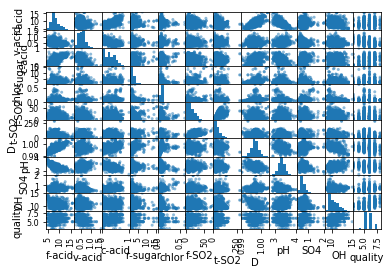

In [22]:
# Scatter Matrix for Red Wines
scatter_matrix(data_red)
plt.show()

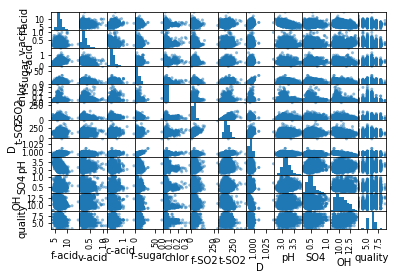

In [23]:
# Scatter Matrix for White Wines
scatter_matrix(data_white)
plt.show()

In [25]:
# Split datasets into train-test sets
arr_r = data_red.values
Xr = arr_r[:,0:11]
Yr = arr_r[:,11]

arr_w = data_white.values
Xw = arr_w[:,0:11]
Yw = arr_w[:,11]

test_size = 0.20 # Default 80-20 split
seed = 7
Xr_train, Xr_test, Yr_train, Yr_test = model_selection.train_test_split(Xr, Yr, test_size=test_size, random_state=seed)
Xw_train, Xw_test, Yw_train, Yw_test = model_selection.train_test_split(Xw, Yw, test_size=test_size, random_state=seed)

In [38]:
# PHASE I - Red Wines (Smaller Dataset)
# Spot-Checking Using Negative Mean Squared Error
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('ENR', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluate each model
scoring = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, Xr_train, Yr_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.438750 (0.046907)
RR: -0.439126 (0.048980)
LASSO: -0.653538 (0.042932)
ENR: -0.653406 (0.045364)
KNN: -0.592741 (0.032934)
CART: -0.730260 (0.075757)
SVM: -0.508986 (0.053989)


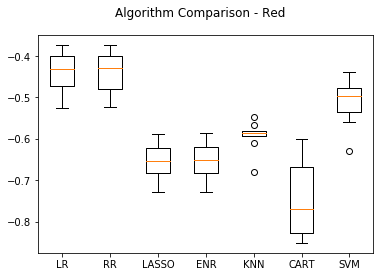

In [36]:
# Visualize Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Red')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# So, LR and RR it is... but poor fit as of now (0.340 < 0.5)

In [56]:
# Make predictions based on LR and RR
LR = LinearRegression()
RR = Ridge()

# Linear Regression
LR.fit(Xr_train, Yr_train)
print("Linear Regression Score (Red Wine): %3f" % LR.score(Xr_test, Yr_test))

# Ridge Regression
RR.fit(Xr_train, Yr_train)
print("Ridge Regression Score (Red Wine): %3f" % RR.score(Xr_test, Yr_test))

# Wow. This needs some tuning...

Linear Regression Score (Red Wine): 0.346886
Ridge Regression Score (Red Wine): 0.353527


In [52]:
# PHASE II - White Wines (Smaller Dataset)
# Spot-Checking Using Negative Mean Squared Error
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('ENR', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluate each model
scoring = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, Xw_train, Yw_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.570157 (0.048654)
RR: -0.571210 (0.037734)
LASSO: -0.747348 (0.054222)
ENR: -0.740421 (0.051573)
KNN: -0.667194 (0.044056)
CART: -0.744011 (0.051005)
SVM: -0.565939 (0.027230)


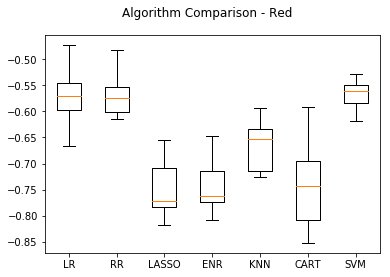

In [46]:
# Visualize Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison - White')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# So, LR and RR it is... but poor fit as of now; SVM is too slow (0.267 < 0.5)

In [55]:
# Make predictions based on LR and RR
LR = LinearRegression()
RR = Ridge()

# Linear Regression
LR.fit(Xw_train, Yw_train)
print("Linear Regression Score (White Wine): %3f" % LR.score(Xw_test, Yw_test))

# Ridge Regression
RR.fit(Xw_train, Yw_train)
print("Ridge Regression Score (White Wine): %3f" % RR.score(Xw_test, Yw_test))

# Wow. This needs some tuning...

Linear Regression Score (White Wine): 0.277870
Ridge Regression Score (White Wine): 0.264538


In [58]:
# NOTE: Tune algorithms to improve accuracy